In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('features_30_sec.csv')

In [4]:
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [5]:
dataset = data[data['label'].isin(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'])].drop(['filename','length'],axis=1)
dataset.iloc[:, :-15].head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var
0,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,...,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415
1,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,...,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291
2,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,...,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151
3,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,...,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400
4,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,...,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing

In [7]:
y = LabelEncoder().fit_transform(dataset.iloc[:,-1])
y.shape

(1000,)

In [8]:
X = StandardScaler().fit_transform(np.array(dataset.iloc[:, :-15], dtype = float))
X.shape

(1000, 43)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (700, 43) (700,)
Test set: (300, 43) (300,)


In [10]:
import tensorflow.keras as keras

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, BatchNormalization
from keras.layers import LSTM

Using TensorFlow backend.


In [ ]:
# Model 1 (FNN)

In [55]:
# defining our regression model 
n_cols = dataset.iloc[:, :-15].shape[1]
def regression_model_1():
    # structure of our model
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(n_cols,)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu',))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(10,activation='softmax'))
    
    # compile model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [66]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=10, 
                                            verbose=1, 
                                            )
Callbacks = [earlystop, learning_rate_reduction]

In [67]:
#build the model
# model_1 = regression_model_1()

#fit the model
# model_1.fit(X_train,y_train, callbacks=Callbacks , validation_data=(X_test,y_test) ,epochs=100,batch_size=150)

Train on 700 samples, validate on 300 samples
Epoch 1/100
700/700 [==============================] - 3s 4ms/step - loss: 2.7826 - accuracy: 0.1471 - val_loss: 2.2480 - val_accuracy: 0.2067
Epoch 2/100
700/700 [==============================] - 0s 259us/step - loss: 2.1722 - accuracy: 0.2871 - val_loss: 2.1732 - val_accuracy: 0.2733
Epoch 3/100
700/700 [==============================] - 0s 319us/step - loss: 1.9252 - accuracy: 0.3386 - val_loss: 2.1049 - val_accuracy: 0.3467
Epoch 4/100
700/700 [==============================] - 0s 288us/step - loss: 1.7512 - accuracy: 0.4171 - val_loss: 2.0423 - val_accuracy: 0.3767
Epoch 5/100
700/700 [==============================] - 0s 264us/step - loss: 1.5767 - accuracy: 0.4586 - val_loss: 1.9857 - val_accuracy: 0.4000
Epoch 6/100
700/700 [==============================] - 0s 289us/step - loss: 1.4685 - accuracy: 0.5029 - val_loss: 1.9340 - val_accuracy: 0.4033
Epoch 7/100
700/700 [==============================] - 0s 249us/step - loss: 1.4284 - 

Epoch 57/100
700/700 [==============================] - 0s 243us/step - loss: 0.2707 - accuracy: 0.9257 - val_loss: 0.9033 - val_accuracy: 0.7333
Epoch 58/100
700/700 [==============================] - 0s 251us/step - loss: 0.2775 - accuracy: 0.9229 - val_loss: 0.9188 - val_accuracy: 0.7333


In [68]:
# model_1.save('Keras_reg_30sec_10.h5')

In [27]:
from keras.models import load_model
model = load_model('Keras_reg_30sec_10.h5')
predictions = model.predict_classes(X_test)
score = model.evaluate(X_test,y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))


accuracy: 73.33%


In [28]:
print(y_test)
print(predictions)

[5 7 7 6 4 6 6 5 8 1 8 0 6 9 9 8 2 8 7 3 5 1 3 5 2 2 1 9 9 9 3 1 6 4 3 1 6
 5 9 0 3 0 3 9 2 2 9 6 4 8 5 8 2 5 0 0 6 0 2 8 2 0 5 2 6 6 6 8 0 5 1 4 5 7
 2 2 6 0 5 3 6 0 2 0 3 5 9 7 7 3 3 4 5 2 7 4 7 0 0 8 7 3 9 2 6 6 5 9 1 9 5
 8 9 8 0 4 1 9 5 2 8 4 7 2 2 5 5 4 8 8 5 8 2 9 5 0 1 2 0 0 0 2 7 2 8 9 8 2
 8 3 6 1 9 4 9 4 3 6 0 8 5 7 6 6 8 6 2 6 3 3 3 4 1 9 4 3 2 2 8 6 4 6 3 5 8
 1 3 3 9 7 9 8 6 1 2 4 3 2 6 0 0 5 6 5 8 5 1 9 4 8 0 1 9 8 6 3 6 2 9 7 3 7
 9 0 8 0 5 3 9 5 3 9 4 5 0 0 2 9 1 3 0 2 5 7 3 1 4 0 0 2 0 9 7 8 3 3 5 9 9
 0 7 4 0 2 3 8 7 3 6 3 4 1 9 2 5 0 1 6 0 7 5 7 2 2 2 7 3 4 2 9 9 7 5 4 3 4
 9 4 0 1]
[3 7 7 6 4 6 6 5 8 1 3 0 6 9 2 6 9 8 7 3 7 1 3 5 2 2 1 9 4 9 3 1 6 4 3 1 4
 5 0 0 3 2 3 9 9 2 9 6 8 8 3 3 2 5 0 0 6 0 2 8 2 4 5 2 6 0 6 8 9 5 1 4 5 8
 9 2 6 0 5 3 6 9 0 0 7 5 0 9 7 8 4 4 5 2 7 8 7 0 0 8 7 6 9 2 6 6 5 9 1 6 5
 8 9 0 0 4 1 9 5 2 8 4 7 2 2 5 5 8 2 3 5 3 2 2 5 0 1 9 0 0 0 2 7 2 7 8 8 2
 4 3 6 1 3 4 9 4 3 6 0 8 5 7 6 6 4 6 2 6 2 4 3 7 1 9 4 4 2 0 2 6 8 3 3 5 4
 1 0 4 3 7 9 8 

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
cf_matrix = confusion_matrix(y_test,predictions)

In [31]:
print(cf_matrix)

[[27  0  3  0  2  0  0  0  0  3]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 2  0 29  0  0  0  0  1  0  5]
 [ 1  0  1 20  5  0  3  2  1  1]
 [ 0  0  0  0 18  0  1  1  4  0]
 [ 0  2  0  3  0 26  0  1  1  0]
 [ 1  0  0  1  1  0 27  0  0  0]
 [ 0  0  0  1  0  0  0 20  1  1]
 [ 1  0  2  4  4  0  1  1 15  1]
 [ 2  0  3  4  1  0  4  1  2 18]]


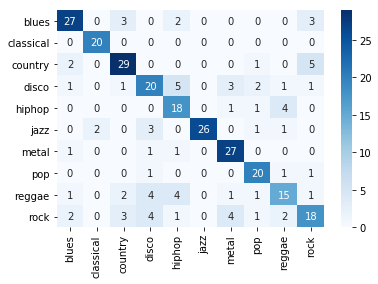

In [37]:
import seaborn as sns
%matplotlib inline
classes=['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
sns.heatmap(cf_matrix, annot=True , cmap='Blues',xticklabels=classes,yticklabels=classes)